# Auto-GPT
The program is an interactive tool that accepts English queries from users for data manipulation, preprocessing and visualization tasks on a pandas DataFrame 'df'. Here our 'df' is credit_risk_dataset, and our user can be a bank employee, dealing with this dataset. The objective of program is to empower a bank employee without the prior knowledge of python or pandas libraries to handle this dataframe.

The program utilizes the OpenAI API to convert the queries into corresponding python commands and code. These code blocks are then automatically executed. Proper error handling ensures smooth execution and enhances user safety during code execution.

In [1]:
#Installing OpenAI
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [133]:
#Importing deps
import pandas as pd
import openai
import os

In [153]:
#Importing Credit_Risk_dataset of bank
df= pd.read_csv('credit_risk_dataset.csv')

In [154]:
#First five entries of dataset to give you idea how our data looks like
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [155]:
column_names = df.columns.tolist() # Returns the column names as a list
columns = ', '.join(column_names) # Returns the column names as a string

In [186]:
#Getting our API key
api_key = 'ENTER YOUR API KEY'
os.environ['OPENAI_API_KEY']= api_key

Now we'll give prompt to OpenAI and generate python commands.  

In [241]:
#Getting Pandas command for the user's query
def response(query, columns):
    #Giving a right prompt to ensure proper reply
    template= f"""You're an AI assisstant helping a bank employee navigate through pandas dataframe 'df' with the following columns:\n{columns}\nAnswer with only Python code to execute: {query}
    Here are some examples-
    query: first 5 entries
    return: df.head()
    query: scatter plot between age and income
    return: df.plot.scatter(x='person_age', y='person_income', title='Scatter Plot between person_age and person_income')
            plt.xlabel('person_age')
            plt.ylabel('person_income')
            plt.grid(True)
            plt.show()
            """
    
    #making API request
    response= openai.Completion.create(
              engine= "text-davinci-002",
              prompt= template,
              temperature= 0,
              max_tokens= 150
    )
    #Extract the reply from the response
    reply= response['choices'][0]['text'].strip()
    return reply

Here is our chatbot that automatically executes our queries. Thus we have automated the execution of queries.

Your query: last 20 entries
       person_age  person_income person_home_ownership  person_emp_length  \
32561          54         129000              MORTGAGE                6.0   
32562          61         160000              MORTGAGE               30.0   
32563          52          71520                  RENT                0.0   
32564          53          45000                  RENT                0.0   
32565          57          40000                  RENT                1.0   
32566          52          30000                  RENT                6.0   
32567          53          85000                  RENT                2.0   
32568          60          49008                   OWN                5.0   
32569          51          60000              MORTGAGE                1.0   
32570          58          72000                  RENT                5.0   
32571          60          45600                  RENT                1.0   
32572          52          52000                

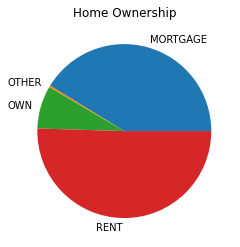

None
Command executed successfully.
Your query: pie chart of home ownership where age is greater than 60


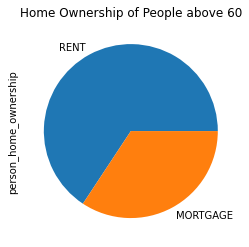

None
Command executed successfully.
Your query: plot between loan amount and interest


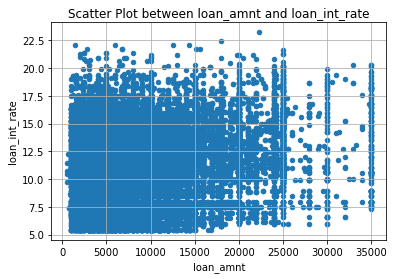

None
Command executed successfully.
Your query: exit
Exiting the program.


In [257]:
while True:
    user_input = input('Your query: ') #taking user input
    
    if user_input != "exit": #exiting when user types exit
        reply = response(user_input, columns) #getting reply from OpenAI
        if reply!= None:
            try: #error handling to ensure proper execution
            #evaluating the command
                #print(reply)
                print(eval(reply))
                print("Command executed successfully.")
            except Exception as e:
                try:# If the evaluation fails, try executing the result as an expression
                    #print(reply)
                    print(exec(reply))
                    print("Command executed successfully.")
                except Exception as e:
                    print("Error executing the command:", str(e))
                    print("Please elaborate on your query")
            # Since there was an exception, the loop will continue and prompt the user for input again.    
        
    else:
        print("Exiting the program.")
        break
         

This was a small demo. We can leverage GPT to perform bigger tasks like creating websites, handling large data, creating script for videos, etc. with the right use of Prompt. 